In [ ]:
# setting up the notebook with important libraries
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
random.seed(42)
from collections import Counter
from nltk.corpus import stopwords
from collections import defaultdict
from IPython.core.display import display, HTML

from sklearn.feature_extraction.text import CountVectorizer

# Mount your Google drive so you can read them easily
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import fileinput

# STEP 1: Download data file from Kaggle
# STEP 2: Unzip the file and upload it to your Google Drive - Remember where you stored it

# Update below address to point to your google drive
filePath ="/content/gdrive/MyDrive/UoT Deep Learning/Kaggle"

# Data import

In [ ]:
# read file
import pandas as pd
train_ds = pd.read_csv(filePath+'/train.csv')
sample_sub = pd.read_csv(filePath+'/sample_submission.csv')
test_ds = pd.read_csv(filePath+'/test.csv', sep=";", low_memory=False, index_col=0, decimal=',')


# Understand data

In [ ]:
# training data overview
train_ds

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5
...,...,...,...,...,...,...,...,...
3906,FFD29828A873,I believe using cellphones in class for educat...,2.5,3.0,3.0,3.5,2.5,2.5
3907,FFD9A83B0849,"Working alone, students do not have to argue w...",4.0,4.0,4.0,4.0,3.5,3.0
3908,FFDC4011AC9C,"""A problem is a chance for you to do your best...",2.5,3.0,3.0,3.0,3.5,3.0
3909,FFE16D704B16,Many people disagree with Albert Schweitzer's ...,4.0,4.5,4.5,4.0,4.5,4.5


In [ ]:
# check label
EEL_metrics = train_ds.columns[-6:]
len(EEL_metrics)

6

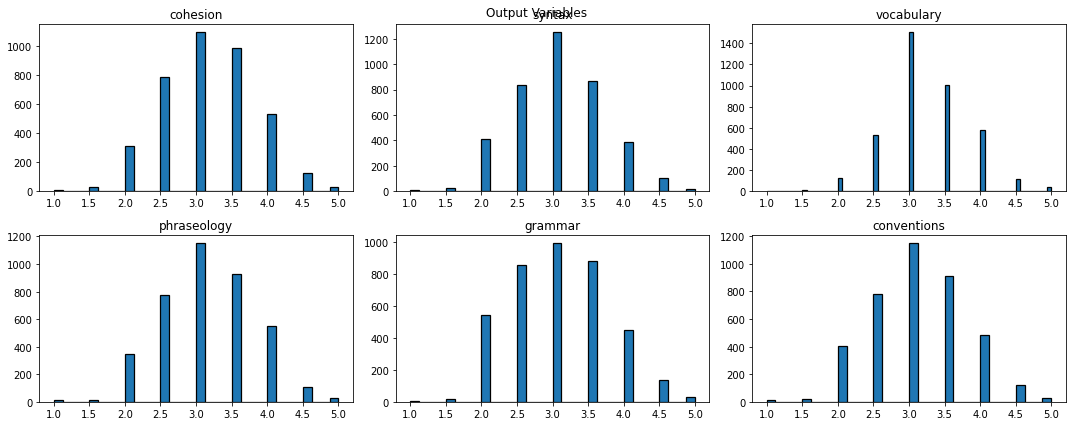

In [ ]:
# check label distribution
fig, axes = plt.subplots(2, len(EEL_metrics)//2, figsize=(15,6))

for i, EEL_metric in enumerate(EEL_metrics):
    ax = axes.flat[i]
    sns.histplot(x=EEL_metric, data=train_ds, linewidth=1.25, alpha=1, ax=ax, zorder=2)
    ax.set_title(EEL_metric)
    ax.set(xlabel=None, ylabel=None)

fig.suptitle('Output Variables')
plt.tight_layout()
plt.show()

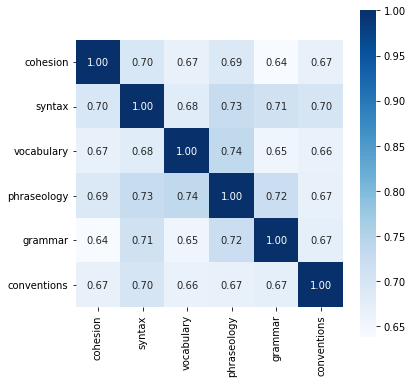

In [ ]:
# check label correlation
corr = train_ds[EEL_metrics].corr()
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(corr,
            xticklabels=corr.columns, yticklabels=corr.columns,
            square=True, annot=True, cmap="Blues", fmt=".2f")
plt.show()
# positive correlations for the six labels, see below for details

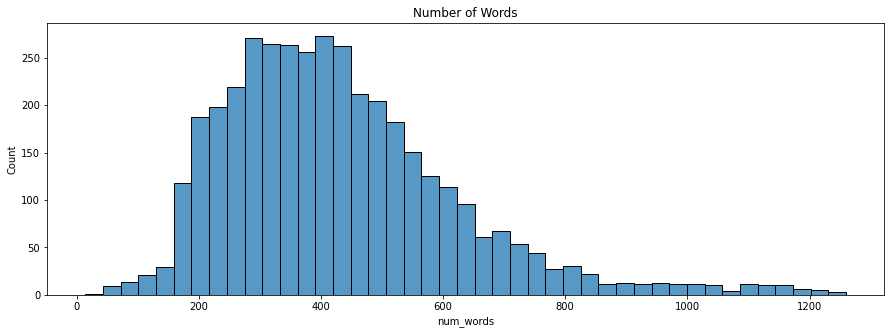

In [ ]:
# check the num of words
fig = plt.figure(figsize=(15, 5))
train_ds['num_words'] = train_ds['full_text'].apply(lambda x: len(x.split()))
sns.histplot(data=train_ds, x="num_words")
plt.title("Number of Words")
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


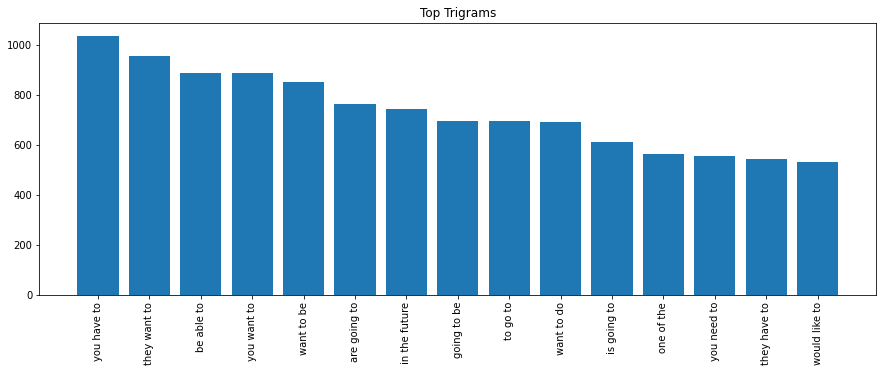

In [ ]:
# check the top combinations
fig = plt.figure(figsize=(15, 5))

def get_top_bigrams(corpus, n):
    vectorizer = CountVectorizer(ngram_range=(n,n)).fit(corpus)
    bag_of_words = vectorizer.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq

top_bigrams = get_top_bigrams(train_ds['full_text'], n=3)[:15]
x, y = map(list, zip(*top_bigrams))
plt.bar(x, y)
plt.title('Top Trigrams')
plt.xticks(rotation=90)
import pandas as pd
import numpy as np
import os
import string
import tensorflow as tf
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
plt.show()

In [ ]:
# store data for futher process
full_text = train_ds['full_text']
cohesion = train_ds['cohesion']
syntax = train_ds['syntax']
vocabulary = train_ds['vocabulary']
phraseology = train_ds['phraseology']
grammar = train_ds['grammar']
conventions = train_ds['conventions']

In [ ]:
# check shape of data stored
full_text.shape

(3911,)

In [ ]:
# check shape of data stored
np.unique(cohesion)

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [ ]:
# check shape of data stored
np.unique(syntax)

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [ ]:
# check shape of data stored
np.unique(vocabulary)

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [ ]:
# check shape of data stored
np.unique(phraseology)

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [ ]:
# check shape of data stored
np.unique(grammar)

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [ ]:
# check shape of data stored
np.unique(conventions)

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

# Preprocessing

In [ ]:
# setting up the notebook with important libraries
import pandas as pd
import numpy as np
import os
import string
import tensorflow as tf
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Text cleansing
import re
import string
def preprocessing(doc):
    doc = doc.lower()
    doc = ' '.join(doc.split())
    doc = re.sub('\[.*?\]', ' ', doc)
    doc = re.sub('[%s]' % re.escape(string.punctuation), ' ', doc)
    doc = re.sub('\w*\d\w*',' ', doc)
    doc = re.sub('\n',' ', doc)
    doc = re.sub('[''""...]',' ', doc)
    return doc

In [ ]:
# quick check
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# dirty check
test_text = 'I am no 1     '
' '.join(test_text.split())

'I am no 1'

In [ ]:
# transform data for further processing
train_ds['cleaned_full_text'] = train_ds['full_text'].apply(lambda x: preprocessing(x))

In [ ]:
# quick check on the cleaned text
# noted cap words are gone. Perods are gone.
train_ds['cleaned_full_text'][0]

'i think that students would benefit from learning at home because they wont have to change and get up early in the morning to shower and do there hair  taking only classes helps them because at there house they ll be pay more attention  they will be comfortable at home  the hardest part of school is getting ready  you wake up go brush your teeth and go to your closet and look at your cloths  after you think you picked a outfit u go look in the mirror and youll either not like it or you look and see a stain  then you ll have to change  with the online classes you can wear anything and stay home and you wont need to stress about what to wear  most students usually take showers before school  they either take it before they sleep or when they wake up  some students do both to smell good  that causes them do miss the bus and effects on there lesson time cause they come late to school  when u have online classes u wont need to miss lessons cause you can get everything set up and go take a 

In [ ]:
# pulled original text for parallel comparison
train_ds['full_text'][0]

"I think that students would benefit from learning at home,because they wont have to change and get up early in the morning to shower and do there hair. taking only classes helps them because at there house they'll be pay more attention. they will be comfortable at home.\n\nThe hardest part of school is getting ready. you wake up go brush your teeth and go to your closet and look at your cloths. after you think you picked a outfit u go look in the mirror and youll either not like it or you look and see a stain. Then you'll have to change. with the online classes you can wear anything and stay home and you wont need to stress about what to wear.\n\nmost students usually take showers before school. they either take it before they sleep or when they wake up. some students do both to smell good. that causes them do miss the bus and effects on there lesson time cause they come late to school. when u have online classes u wont need to miss lessons cause you can get everything set up and go t

In [ ]:
# store the cleaned text for training
clean_essay = train_ds['cleaned_full_text']

# Process text

In [ ]:
# setting up the notebook with important libraries
!pip install transformers
from transformers import AutoTokenizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 5.0 MB/s 
     |████████████████████████████████| 7.6 MB 59.7 MB/s 
     |████████████████████████████████| 182 kB 96.0 MB/s 


In [ ]:
# store words in list_words
list_words = [len(text.split()) for text in full_text]

In [ ]:
# check words max num
seq_len = np.max(list_words)
seq_len

1260

In [ ]:
# download tokenizer initiator
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
# create list for tickenization process
input_ids = []
attention_mask = []

In [ ]:
# loop for tokens
for index, value in enumerate(full_text):
  tokens = tokenizer.encode_plus(value, max_length = seq_len,padding = "max_length",
                                 truncation = True, return_token_type_ids = True,
                                 return_attention_mask = True,
                                 return_tensors = 'np')
  input_ids.append(tokens['input_ids'])
  attention_mask.append(tokens['attention_mask'])

In [ ]:
# assign values for input_ids and attention_mask
input_ids = np.asarray(input_ids)
attention_mask = np.asarray(attention_mask)

In [ ]:
# quick check
input_ids.shape

(3911, 1, 1260)

In [ ]:
# save reshape
input_ids = np.reshape(input_ids, (input_ids.shape[0], input_ids.shape[2]))
attention_mask = np.reshape(attention_mask, (attention_mask.shape[0], attention_mask.shape[2]))

In [ ]:
# quick check
input_ids.shape

(3911, 1260)

In [ ]:
# quick check
len(syntax)

3911

In [ ]:
# store label values for different metrics
syntax = np.asarray(syntax)
cohesion = np.asarray(cohesion)
vocabulary = np.asarray(vocabulary)
phraseology = np.asarray(phraseology)
grammar = np.asarray(grammar)
conventions = np.asarray(conventions)

# Linear Regression

In [ ]:
# Create train dataset and test dataset
from sklearn.model_selection import train_test_split
vectorizer = CountVectorizer(max_features = 10000, ngram_range=(1, 3), stop_words='english')
count_vectors = vectorizer.fit_transform(clean_essay)
feature_names = vectorizer.get_feature_names()
X = count_vectors.toarray()
y = syntax
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# quick check
X_train.shape

(3128, 10000)

In [ ]:
# quick check
X_test.shape

(783, 10000)

In [ ]:
# quick check
y_train.shape

(3128,)

In [ ]:
# quick check
y_test.shape

(783,)

## syntax Linear regression

In [ ]:
# import libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pickle
#use LinearRegression to fit the data

model_1 = LinearRegression()
history1 = model_1.fit(X_train, y_train)
y_pred = model_1.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 0.62


In [ ]:
# predict first 30 results
pd.DataFrame({
    'y_pred': y_pred,
    'y_true': y_test,
    'loss': y_pred -  y_test
}).head(n= 30)

,y_pred,y_true,loss
0,2.424208,2.5,-0.075792
1,2.550240,2.5,0.050240
2,2.673568,4.0,-1.326432
3,3.282195,3.5,-0.217805
4,3.853937,2.5,1.353937
5,3.175467,3.5,-0.324533
6,2.959895,4.0,-1.040105
7,4.418813,4.0,0.418813
8,3.409546,3.0,0.409546
9,2.232810,2.0,0.232810


## cohesion Linear regression

In [ ]:
# Create train dataset and test dataset
vectorizer = CountVectorizer(max_features = 10000, ngram_range=(1, 3), stop_words='english')
count_vectors = vectorizer.fit_transform(clean_essay)
feature_names = vectorizer.get_feature_names()
X = count_vectors.toarray()
y_2 = cohesion
X_train, X_test, y_2_train, y_2_test = train_test_split(X, y_2, test_size = 0.2)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#quick check
y_2_train.shape

(3128,)

In [ ]:
# training model
model_2 = LinearRegression()
history2 = model_2.fit(X_train, y_2_train)
y_2_pred = model_2.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_2_test, y_2_pred))

Mean squared error: 0.73


In [ ]:
# predict first 30 results
pd.DataFrame({
    'y_pred': y_2_pred,
    'y_true': y_2_test,
    'loss': y_2_pred -  y_2_test
}).head(n= 30)

,y_pred,y_true,loss
0,2.910770,3.0,-0.089230
1,2.203923,3.0,-0.796077
2,3.448574,2.5,0.948574
3,2.885885,4.5,-1.614115
4,2.868111,4.0,-1.131889
5,3.140816,2.5,0.640816
6,3.127993,2.5,0.627993
7,2.697724,2.5,0.197724
8,2.571441,2.5,0.071441
9,3.508152,2.5,1.008152


## vocabulary Linear regression

In [ ]:
# Create train dataset and test dataset
vectorizer = CountVectorizer(max_features = 10000, ngram_range=(1, 3), stop_words='english')
count_vectors = vectorizer.fit_transform(clean_essay)
feature_names = vectorizer.get_feature_names()
X = count_vectors.toarray()
y_3 = vocabulary
X_train, X_test, y_3_train, y_3_test = train_test_split(X, y_3, test_size = 0.2)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# quick check
y_3_train.shape

(3128,)

In [ ]:
# training model
model_3 = LinearRegression()
history3 = model_3.fit(X_train, y_3_train)
y_3_pred = model_3.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_3_test, y_3_pred))

Mean squared error: 0.54


In [ ]:
# predict first 30 results
pd.DataFrame({
    'y_pred': y_3_pred,
    'y_true': y_3_test,
    'loss': y_3_pred -  y_3_test
}).head(n= 30)

,y_pred,y_true,loss
0,2.972346,2.0,0.972346
1,3.370588,3.0,0.370588
2,5.486127,3.5,1.986127
3,3.616657,4.0,-0.383343
4,3.115002,3.0,0.115002
5,0.503108,3.0,-2.496892
6,3.614027,3.5,0.114027
7,3.315208,3.5,-0.184792
8,2.597203,3.5,-0.902797
9,2.650938,2.5,0.150938


## phraseology Linear regression

In [ ]:
# Create train dataset and test dataset
vectorizer = CountVectorizer(max_features = 10000, ngram_range=(1, 3), stop_words='english')
count_vectors = vectorizer.fit_transform(clean_essay)
feature_names = vectorizer.get_feature_names()
X = count_vectors.toarray()
y_4 = phraseology
X_train, X_test, y_4_train, y_4_test = train_test_split(X, y_4, test_size = 0.2)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#quick check
y_4_train.shape

(3128,)

In [ ]:
# training model
model_4 = LinearRegression()
history4 = model_4.fit(X_train, y_4_train)
y_4_pred = model_4.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_4_test, y_4_pred))

Mean squared error: 0.70


In [ ]:
# predict first 30 results
pd.DataFrame({
    'y_pred': y_4_pred,
    'y_true': y_4_test,
    'loss': y_4_pred -  y_4_test
}).head(n= 30)

,y_pred,y_true,loss
0,3.807641,4.0,-0.192359
1,2.762483,3.5,-0.737517
2,3.168452,3.0,0.168452
3,3.334024,3.0,0.334024
4,3.318895,3.5,-0.181105
5,2.331006,3.0,-0.668994
6,3.408762,4.0,-0.591238
7,2.669663,2.5,0.169663
8,3.739797,4.0,-0.260203
9,2.443665,3.0,-0.556335


## grammar Linear regression

In [ ]:
# Create train dataset and test dataset
vectorizer = CountVectorizer(max_features = 10000, ngram_range=(1, 3), stop_words='english')
count_vectors = vectorizer.fit_transform(clean_essay)
feature_names = vectorizer.get_feature_names()
X = count_vectors.toarray()
y_5 = grammar
X_train, X_test, y_5_train, y_5_test = train_test_split(X, y_5, test_size = 0.2)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# quick check
y_5_train.shape

(3128,)

In [ ]:
# training model
model_5 = LinearRegression()
history5 = model_5.fit(X_train, y_5_train)
y_5_pred = model_5.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_5_test, y_5_pred))

Mean squared error: 0.81


In [ ]:
# predict first 30 results
pd.DataFrame({
    'y_pred': y_5_pred,
    'y_true': y_5_test,
    'loss': y_5_pred -  y_5_test
}).head(n= 30)

,y_pred,y_true,loss
0,2.458835,2.5,-0.041165
1,1.884656,4.0,-2.115344
2,2.226857,2.5,-0.273143
3,3.269985,2.0,1.269985
4,2.564791,3.5,-0.935209
5,1.997127,2.5,-0.502873
6,3.247311,4.5,-1.252689
7,3.136452,4.0,-0.863548
8,3.124496,4.0,-0.875504
9,3.476814,3.5,-0.023186


## conventions Linear regression

In [ ]:
# Create train dataset and test dataset
vectorizer = CountVectorizer(max_features = 10000, ngram_range=(1, 3), stop_words='english')
count_vectors = vectorizer.fit_transform(clean_essay)
feature_names = vectorizer.get_feature_names()
X = count_vectors.toarray()
y_6 = conventions
X_train, X_test, y_6_train, y_6_test = train_test_split(X, y_6, test_size = 0.2)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# quick check
y_6_train.shape

(3128,)

In [ ]:
# training model
model_6 = LinearRegression()
history6 = model_6.fit(X_train, y_6_train)
y_6_pred = model_6.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_6_test, y_6_pred))

Mean squared error: 0.68


In [ ]:
# predict first 30 results
pd.DataFrame({
    'y_pred': y_6_pred,
    'y_true': y_6_test,
    'loss': y_6_pred -  y_6_test
}).head(n= 30)

,y_pred,y_true,loss
0,3.094084,3.5,-0.405916
1,3.220076,3.0,0.220076
2,4.692964,3.5,1.192964
3,3.016042,3.5,-0.483958
4,3.275644,3.0,0.275644
5,3.322325,2.5,0.822325
6,2.973817,3.5,-0.526183
7,3.593832,3.0,0.593832
8,3.002484,2.5,0.502484
9,1.673640,2.0,-0.326360


# SVR


In [ ]:
from sklearn.svm import SVR

In [ ]:
# cohesion in SVR
vectorizer = CountVectorizer(max_features = 10000, ngram_range=(1, 3), stop_words='english')
count_vectors = vectorizer.fit_transform(clean_essay)
feature_names = vectorizer.get_feature_names()
X = count_vectors.toarray()
y_1s = cohesion
X_train, X_test, y_1s_train, y_1s_test = train_test_split(X, y_1s, test_size = 0.2)

clf_c = SVR(C=1.0, epsilon=0.2)
clf_c.fit(X_train, y_1s_train)

y_pred_s1=clf_c.predict(X_test)
print("Mean squared error:%.2f"%mean_squared_error(y_test,y_pred_s1))

pd.DataFrame({
    'y_pred': y_pred_s1,
    'y_true': y_1s_test,
    'loss': y_pred_s1 -  y_1s_test
}).head(n= 5)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Mean squared error:0.51


,y_pred,y_true,loss
0,3.221467,4.0,-0.778533
1,3.309161,4.0,-0.690839
2,2.948274,2.5,0.448274
3,2.978253,2.5,0.478253
4,3.461650,4.0,-0.538350


In [ ]:
# vocabulary in SVR
y_2s = conventions
X_train, X_test, y_2s_train, y_2s_test = train_test_split(X, y_2s, test_size = 0.2)

clf_v = SVR(C=1.0, epsilon=0.2)
clf_v.fit(X_train, y_2s_train)

y_pred_s2=clf_v.predict(X_test)
print("Mean squared error:%.2f"%mean_squared_error(y_test,y_pred_s2))

pd.DataFrame({
    'y_pred': y_pred_s2,
    'y_true': y_2s_test,
    'loss': y_pred_s2 - y_2s_test
}).head(n= 5)

Mean squared error:0.48


,y_pred,y_true,loss
0,3.252105,4.0,-0.747895
1,2.981688,2.5,0.481688
2,2.944413,3.5,-0.555587
3,3.303828,4.0,-0.696172
4,3.327258,3.5,-0.172742


In [ ]:
# Phraseology in SVR
y_3s = phraseology
X_train, X_test, y_3s_train, y_3s_test = train_test_split(X, y_3s, test_size = 0.2)

clf_p = SVR(C=1.0, epsilon=0.2)
clf_p.fit(X_train, y_3s_train)

y_pred_s3=clf_p.predict(X_test)
print("Mean squared error:%.2f"%mean_squared_error(y_test,y_pred_s3))

pd.DataFrame({
    'y_pred': y_pred_s3,
    'y_true': y_3s_test,
    'loss': y_pred_s3 - y_3s_test
}).head(n= 5)

Mean squared error:0.49


,y_pred,y_true,loss
0,3.192254,2.5,0.692254
1,2.995233,3.5,-0.504767
2,3.175963,3.5,-0.324037
3,3.202978,3.5,-0.297022
4,3.045299,3.0,0.045299


In [ ]:
# Grammar in SVR
y_4s = grammar
X_train, X_test, y_4s_train, y_4s_test = train_test_split(X, y_4s, test_size = 0.2)

clf_g = SVR(C=1.0, epsilon=0.2)
clf_g.fit(X_train, y_4s_train)

y_pred_s4=clf_g.predict(X_test)
print("Mean squared error:%.2f"%mean_squared_error(y_test,y_pred_s3))

pd.DataFrame({
    'y_pred': y_pred_s4,
    'y_true': y_4s_test,
    'loss': y_pred_s4 - y_4s_test
}).head(n= 5)

Mean squared error:0.49


,y_pred,y_true,loss
0,2.912351,3.0,-0.087649
1,2.340362,2.5,-0.159638
2,3.689221,4.0,-0.310779
3,2.413340,1.5,0.913340
4,3.133988,4.5,-1.366012


In [ ]:
# Conventions in SVR

y_6s = conventions
X_train, X_test, y_6s_train, y_6s_test = train_test_split(X, y_6s, test_size = 0.2)

clf_g = SVR(C=1.0, epsilon=0.2)
clf_g.fit(X_train, y_6s_train)

y_pred_s6=clf_g.predict(X_test)
print("Mean squared error:%.2f"%mean_squared_error(y_test,y_pred_s6))

pd.DataFrame({
    'y_pred': y_pred_s6,
    'y_true': y_6s_test,
    'loss': y_pred_s6 - y_6s_test
}).head(n= 5)

Mean squared error:0.48


,y_pred,y_true,loss
0,2.522341,3.0,-0.477659
1,3.147671,3.0,0.147671
2,3.040607,3.0,0.040607
3,3.008546,2.5,0.508546
4,2.986486,3.0,-0.013514


In [ ]:
y_7s = syntax
X_train, X_test, y_7s_train, y_7s_test = train_test_split(X, y_7s, test_size = 0.2)

clf_s = SVR(C=1.0, epsilon=0.2)
clf_s.fit(X_train, y_7s_train)

y_pred_s7=clf_g.predict(X_test)
print("Mean squared error:%.2f"%mean_squared_error(y_test,y_pred_s7))

pd.DataFrame({
    'y_pred': y_pred_s7,
    'y_true': y_7s_test,
    'loss': y_pred_s6 - y_6s_test
}).head(n= 5)

Mean squared error:0.57


,y_pred,y_true,loss
0,2.825345,3.5,-0.477659
1,1.888058,1.0,0.147671
2,3.199794,3.5,0.040607
3,3.772982,4.0,0.508546
4,3.184340,3.0,-0.013514


# Ramdom Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#Cohesion
y_1r = cohesion
X_train, X_test, y_1r_train, y_1r_test = train_test_split(X, y_1r, test_size = 0.2)

rf1 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf1.fit(X_train, y_1r_train)

pred_1r = rf1.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, pred_1r))

Mean squared error: 0.45


In [ ]:
#Vocabulary
y_1v = vocabulary
X_train, X_test, y_1v_train, y_1v_test = train_test_split(X, y_1v, test_size = 0.2)

rf2 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf2.fit(X_train, y_1v_train)

pred_1v = rf2.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, pred_1v))

In [ ]:
#phraseology
y_1p = phraseology
X_train, X_test, y_1p_train, y_1p_test = train_test_split(X, y_1p, test_size = 0.2)

rf3 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf3.fit(X_train, y_1p_train)

pred_1p = rf3.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, pred_1p))

In [ ]:
#grammar
y_1m = grammar
X_train, X_test, y_1m_train, y_1m_test = train_test_split(X, y_1m, test_size = 0.2)

rf4 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf4.fit(X_train, y_1p_train)

pred_1m = rf4.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, pred_1m))

In [ ]:
#convention
y_1c = conventions
X_train, X_test, y_1m_train, y_1c_test = train_test_split(X, y_1c, test_size = 0.2)


rf5 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf5.fit(X_train, y_1p_train)

pred_1c = rf5.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, pred_1c))

In [ ]:
y_1s = syntax
X_train, X_test, y_1s_train, y_1s_test = train_test_split(X, y_1s, test_size = 0.2)

rf6 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf6.fit(X_train, y_1s_train)

pred_1s = rf6.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, pred_1s))